In [1]:
import matplotlib
matplotlib.use('agg')
import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets
import time

PATCH_PATH = ('ipmlb') # image, prob, binary, largeborder


Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearnNEW/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:

t0=time.time()
X_train, y_train, X_test, y_test = gp.Patch.load_rgba(PATCH_PATH)

# print 'Training patches', y_train.shape[0]
# print 'Test patches', y_test.shape[0]

# X_train, y_train, X_test, y_test = gp.Patch.load_rgb(PATCH_PATH)
# X_train = X_train[:,:-1,:,:]
# X_test = X_test[:,:-1,:,:]

print time.time()-t0

Loaded /home/d/patches//ipmlb/ in 0.000643968582153 seconds.
32.1650679111


In [4]:
t0 =time.time()
X_train = np.delete(X_train, [0] , axis=1) # delete image
print time.time() - t0

4.88444399834


In [5]:
X_train.shape

(225520, 3, 75, 75)

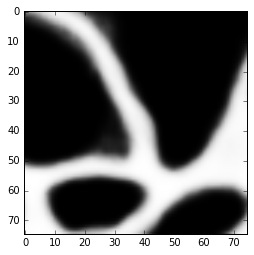

In [6]:
imshow(X_train[0][0], cmap='gray')

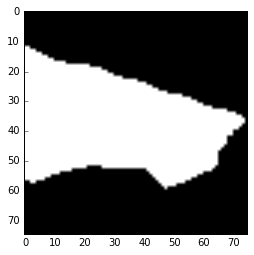

In [7]:
imshow(X_train[0][1], cmap='gray')

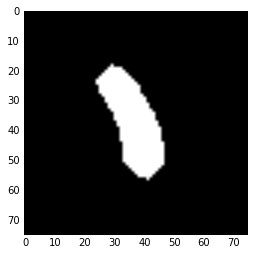

In [8]:
imshow(X_train[0][2], cmap='gray')

In [9]:
t0 =time.time()
X_test = np.delete(X_test, [0] , axis=1) # delete image
print time.time() - t0

0.349529027939


In [10]:

cnn = nets.RGBNetPlus()

cnn = cnn.fit(X_train, y_train)

test_accuracy = cnn.score(X_test, y_test)

print test_accuracy

# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/PMLB_FULL.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)

CNN configuration: 
    Our CNN with image, prob, merged_array as RGB.

    This includes dropout. This also includes more layers.
    
# Neural Network with 170898 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     3x75x75
  1  conv1     64x73x73
  2  pool1     64x36x36
  3  dropout1  64x36x36
  4  conv2     48x34x34
  5  pool2     48x17x17
  6  dropout2  48x17x17
  7  conv3     48x15x15
  8  pool3     48x7x7
  9  dropout3  48x7x7
 10  conv4     48x5x5
 11  pool4     48x2x2
 12  dropout4  48x2x2
 13  hidden5   512
 14  dropout5  512
 15  output    2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -------
      1     0.27987     0.23991    1.16657      0.90837  191.98s
      2     0.22107     0.21986    1.00551      0.91722  192.00s
      3     0.21687     0.21978    0.98677      0.91715  192.04s
      4     0.21357     0.21816    0.97897      0.91784  191.94s
    

In [11]:
# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/PMLB_FULL.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)